In [1]:
import pandas as pd

In [2]:
# Load dataset
df = pd.read_csv('/Users/andrew/Downloads/labeled_data.csv',index_col=0)

In [3]:
# View first 5 rows of dataframe
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


The dataset has 6 columns. The 'tweet' column contains the tweets. Class has three unique values - 0,1 and 2. 

0 - hate speech

1 - offensive language

2 - neither

The 'hate_speech', 'offensive_language' and 'neither' columns contain corresponding ratings of individual tweets. The 'count' column contains the count of total ratings for a tweet. 

In [4]:
# Looking at a single tweet to get an idea of what to expect 
df['tweet'][5]

'!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"'

In [5]:
# Looking at metadata of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24783 entries, 0 to 25296
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.8+ MB


From the above, I can see that the dataset has 24783 rows and 6 columns. 5 of the columns contain int64 data

In [6]:
# Creating a new feature called tweet_length
df['tweet_length'] = df['tweet'].apply(len)

In [7]:
# Checking that last action did not introduce an error
df.head()

,count,hate_speech,offensive_language,neither,class,tweet,tweet_length
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

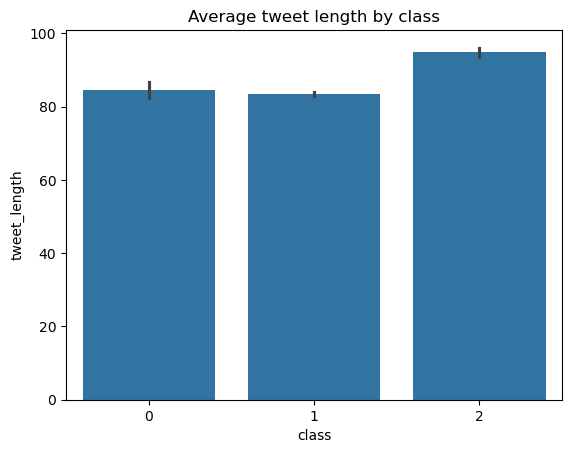

In [9]:
# Visualing average tweet length by class
sns.barplot(df,x='class',y='tweet_length')
plt.title('Average tweet length by class')
plt.show()

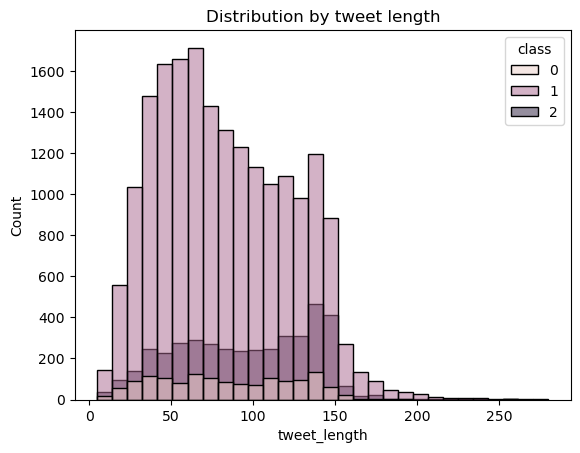

In [10]:
# Distribution of tweet length by class
sns.histplot(data=df[df['tweet_length']<=280],
             x=df[df['tweet_length']<=280]['tweet_length'],
             hue=df[df['tweet_length']<=280]['class'],         
             color='blue',
             bins=30)
plt.title('Distribution by tweet length')
plt.show()

In [11]:
# Number of tweets by class
df.groupby('class').count()['tweet']

class
0     1430
1    19190
2     4163
Name: tweet, dtype: int64

In [12]:
# Maximum tweet length
max_index = df['tweet_length'].idxmax()
max_index

18267

In [13]:
# Displaying longest tweet
# Considering that the max length of a tweet is 280, this looks like an error. Consulting stakeholders to confirm 
# why tweets like this exist in our data before dropping them is a good idea. 

df[df['tweet_length'] == df['tweet_length'].max()]['tweet'].loc[max_index]

'RT @TrxllLegend: One good girl is worth a thousand bitches\n\n&#128112; = &#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#128109;&#8230;'

In [14]:
# Tweets with more than 280 characteristics
df[df['tweet_length'] >= 280]['tweet'].info()

<class 'pandas.core.series.Series'>
Index: 20 entries, 1145 to 22504
Series name: tweet
Non-Null Count  Dtype 
--------------  ----- 
20 non-null     object
dtypes: object(1)
memory usage: 320.0+ bytes


In [15]:
# Creating a new dataframe without the rows with tweets with more than 280 characters
df_v2 = df[df['tweet_length'] <= 280]

In [16]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24764 entries, 0 to 25296
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24764 non-null  int64 
 1   hate_speech         24764 non-null  int64 
 2   offensive_language  24764 non-null  int64 
 3   neither             24764 non-null  int64 
 4   class               24764 non-null  int64 
 5   tweet               24764 non-null  object
 6   tweet_length        24764 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ MB


In [17]:
# Displaying first five rows of new dataset
df_v2.head()

,count,hate_speech,offensive_language,neither,class,tweet,tweet_length
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137


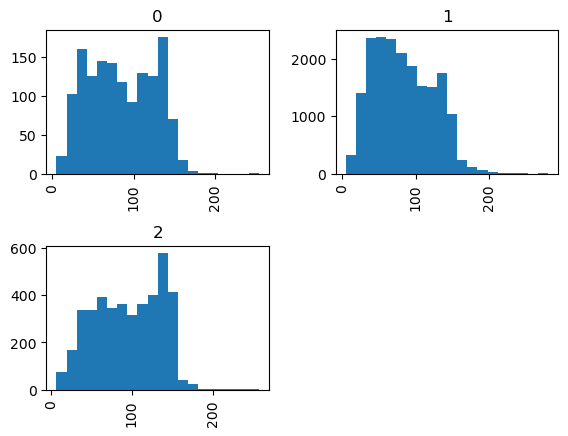

In [18]:
# Distribution of tweet_length by class
import matplotlib.pyplot as plt
df_v2.hist(column='tweet_length',by='class',bins=20)
plt.show()

In [19]:
# Mean tweet length by class
df_v2.groupby('class')['tweet_length'].mean()

class
0    84.586713
1    83.155435
2    94.747477
Name: tweet_length, dtype: float64

In [20]:
def remove_username(tweet):
    '''Function that takes a tweet as an agreement and removes 
    twitter handle
    '''
    words_list = []
    for word in tweet.split():
        if not word.startswith('@'):
            words_list.append(word)
    return ' '.join(words_list)


In [21]:
# Libraries needed for custom text_processing function below
import string
from nltk.corpus import stopwords

In [22]:
def text_processing(tweet):
    ''' Function takes in tweet as argument and returns a list of 
    of words in the string with stopwords, punctuation marks and 
    the twitter handle removed'''
    words_list = []
    for word in tweet.split():
        if word.startswith('@'):
            continue  # Skip twitter handles
        else:
            words_list.append(word)

    nopunc = [char for char in ' '.join(words_list) if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [23]:
#df_v2['tweet_edited'] = df_v2['tweet'].apply(remove_username)

In [24]:
# New tweet feature created using text_processing function
df_v2['tweet_edited'] = df_v2['tweet'].apply(text_processing)

/var/folders/4z/s5yytqj535948_tn28lrcsr40000gn/T/ipykernel_12554/254109192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v2['tweet_edited'] = df_v2['tweet'].apply(text_processing)


In [25]:
df_v2.head()

,count,hate_speech,offensive_language,neither,class,tweet,tweet_length,tweet_edited
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,"[RT, woman, shouldnt, complain, cleaning, hous..."
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,"[RT, boy, dats, coldtyga, dwn, bad, cuffin, da..."
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,"[RT, Dawg, RT, ever, fuck, bitch, start, cry, ..."
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,"[RT, look, like, tranny]"
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,"[RT, shit, hear, might, true, might, faker, bi..."


In [26]:
df_v2['hate_speech_rating'] = df_v2['hate_speech']/df_v2['count']
df_v2['offensive_language_rating'] = df_v2['offensive_language']/df_v2['count']
df_v2['neither_rating'] = df_v2['neither']/df_v2['count']

/var/folders/4z/s5yytqj535948_tn28lrcsr40000gn/T/ipykernel_12554/1439524767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v2['hate_speech_rating'] = df_v2['hate_speech']/df_v2['count']
/var/folders/4z/s5yytqj535948_tn28lrcsr40000gn/T/ipykernel_12554/1439524767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v2['offensive_language_rating'] = df_v2['offensive_language']/df_v2['count']
/var/folders/4z/s5yytqj535948_tn28lrcsr40000gn/T/ipykernel_12554/1439524767.py:3: SettingWithCopyWarning: 
A v

In [27]:
df_v2.head(2)

,count,hate_speech,offensive_language,neither,class,tweet,tweet_length,tweet_edited,hate_speech_rating,offensive_language_rating,neither_rating
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,"[RT, woman, shouldnt, complain, cleaning, hous...",0.0,0.0,1.0
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,"[RT, boy, dats, coldtyga, dwn, bad, cuffin, da...",0.0,1.0,0.0


In [28]:
# Library that tranforms numerals into words
from num2words import num2words

In [29]:
num2words(1.33)

'one point three three'

In [30]:
# Transforming numeric ratings into words

In [31]:
df_v2['hate_speech_rating_words'] = df_v2['hate_speech_rating'].apply(lambda x: num2words(round(x,1)))

/var/folders/4z/s5yytqj535948_tn28lrcsr40000gn/T/ipykernel_12554/2916285753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v2['hate_speech_rating_words'] = df_v2['hate_speech_rating'].apply(lambda x: num2words(round(x,1)))


In [32]:
df_v2['offensive_language_rating_words'] = df_v2['offensive_language_rating'].apply(lambda x: num2words(round(x,1)))

/var/folders/4z/s5yytqj535948_tn28lrcsr40000gn/T/ipykernel_12554/809957158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v2['offensive_language_rating_words'] = df_v2['offensive_language_rating'].apply(lambda x: num2words(round(x,1)))


In [33]:
df_v2['neither_rating_words'] = df_v2['neither_rating'].apply(lambda x: num2words(round(x,1)))

/var/folders/4z/s5yytqj535948_tn28lrcsr40000gn/T/ipykernel_12554/244279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v2['neither_rating_words'] = df_v2['neither_rating'].apply(lambda x: num2words(round(x,1)))


In [34]:
df_v2.head(2)

,count,hate_speech,offensive_language,neither,class,tweet,tweet_length,tweet_edited,hate_speech_rating,offensive_language_rating,neither_rating,hate_speech_rating_words,offensive_language_rating_words,neither_rating_words
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,"[RT, woman, shouldnt, complain, cleaning, hous...",0.0,0.0,1.0,zero,zero,one
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,"[RT, boy, dats, coldtyga, dwn, bad, cuffin, da...",0.0,1.0,0.0,zero,one,zero


In [35]:
# Transforming list of words in tweet_edited column to sentences
df_v2['tweet_edited'] = df_v2['tweet_edited'].apply(lambda x: ' '.join(x))

/var/folders/4z/s5yytqj535948_tn28lrcsr40000gn/T/ipykernel_12554/1275478253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v2['tweet_edited'] = df_v2['tweet_edited'].apply(lambda x: ' '.join(x))


In [36]:
# Combining tweet_edited and rating in words
df_v2['tweet_edited_with_ratings'] = df_v2['tweet_edited'] + ' ' + df_v2['hate_speech_rating_words'] + ' ' + df_v2['offensive_language_rating_words'] + ' ' + df_v2['neither_rating_words']

/var/folders/4z/s5yytqj535948_tn28lrcsr40000gn/T/ipykernel_12554/3400965476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v2['tweet_edited_with_ratings'] = df_v2['tweet_edited'] + ' ' + df_v2['hate_speech_rating_words'] + ' ' + df_v2['offensive_language_rating_words'] + ' ' + df_v2['neither_rating_words']


In [37]:
# Checking that it worked
df_v2['tweet_edited_with_ratings'][9]

'hobbies include fighting Mariam bitch zero point three zero point seven zero'

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Building models to classify the 3 groups

In [39]:
tweet_train,tweet_test,label_train,label_test=train_test_split(df_v2['tweet_edited_with_ratings'],
                                                           df_v2['class'],
                                                           test_size=0.2,
                                                              stratify=df_v2['class'])

In [40]:
tweet_train.head(2)

16940    RT dick called Batman bitches love Dark Knight...
17622    RT Uncle leo find iWatch trash httptcoT7GCSMCY...
Name: tweet_edited_with_ratings, dtype: object

### Naive Bayes Classifier

In [41]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier', MultinomialNB())
])

pipeline.fit(tweet_train,label_train)

predictions = pipeline.predict(tweet_test)


print(confusion_matrix(label_test, predictions))
print('\n')
print(classification_report(label_test, predictions)) 

[[   0  286    0]
 [   0 3832    3]
 [   0  744   88]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       286
           1       0.79      1.00      0.88      3835
           2       0.97      0.11      0.19       832

    accuracy                           0.79      4953
   macro avg       0.59      0.37      0.36      4953
weighted avg       0.77      0.79      0.71      4953



/Users/andrew/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andrew/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andrew/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

### Decision Tree Classifier

In [42]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier', DecisionTreeClassifier())
])

pipeline.fit(tweet_train,label_train)

predictions = pipeline.predict(tweet_test)


print(confusion_matrix(label_test, predictions))
print('\n')
print(classification_report(label_test, predictions))      

[[  77  178   31]
 [ 104 3557  174]
 [  28  142  662]]


              precision    recall  f1-score   support

           0       0.37      0.27      0.31       286
           1       0.92      0.93      0.92      3835
           2       0.76      0.80      0.78       832

    accuracy                           0.87      4953
   macro avg       0.68      0.66      0.67      4953
weighted avg       0.86      0.87      0.86      4953



### Random Forest Classifier

In [43]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])
pipeline.fit(tweet_train,label_train)

predictions = pipeline.predict(tweet_test)

print(confusion_matrix(label_test, predictions))
print('\n')
print(classification_report(label_test, predictions))      

[[  30  245   11]
 [  10 3760   65]
 [   1  295  536]]


              precision    recall  f1-score   support

           0       0.73      0.10      0.18       286
           1       0.87      0.98      0.92      3835
           2       0.88      0.64      0.74       832

    accuracy                           0.87      4953
   macro avg       0.83      0.58      0.62      4953
weighted avg       0.87      0.87      0.85      4953



### K Nearest neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier', KNeighborsClassifier(n_neighbors=7))
])

pipeline.fit(tweet_train,label_train)

predictions = pipeline.predict(tweet_test)


print(confusion_matrix(label_test, predictions))
print('\n')
print(classification_report(label_test, predictions)) 

[[  73  198   15]
 [  66 3708   61]
 [  14  566  252]]


              precision    recall  f1-score   support

           0       0.48      0.26      0.33       286
           1       0.83      0.97      0.89      3835
           2       0.77      0.30      0.43       832

    accuracy                           0.81      4953
   macro avg       0.69      0.51      0.55      4953
weighted avg       0.80      0.81      0.78      4953



[[  47  234    5]
 [  45 3754   36]
 [   4  574  254]]


              precision    recall  f1-score   support

           0       0.49      0.16      0.25       286
           1       0.82      0.98      0.89      3835
           2       0.86      0.31      0.45       832

    accuracy                           0.82      4953
   macro avg       0.72      0.48      0.53      4953
weighted avg       0.81      0.82      0.78      4953


[[  52  359   18]
 [  50 5644   58]
 [   2  891  356]]


              precision    recall  f1-score   support

           0       0.50      0.12      0.20       429
           1       0.82      0.98      0.89      5752
           2       0.82      0.29      0.42      1249

    accuracy                           0.81      7430
   macro avg       0.71      0.46      0.50      7430
weighted avg       0.80      0.81      0.77      7430


### Support Vector Machine Algorithm

In [46]:
from sklearn.svm import SVC

In [47]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier', SVC())
])

pipeline.fit(tweet_train,label_train)

predictions = pipeline.predict(tweet_test)


print(confusion_matrix(label_test, predictions))
print('\n')
print(classification_report(label_test, predictions))   

[[  39  232   15]
 [  15 3720  100]
 [   1  166  665]]


              precision    recall  f1-score   support

           0       0.71      0.14      0.23       286
           1       0.90      0.97      0.94      3835
           2       0.85      0.80      0.83       832

    accuracy                           0.89      4953
   macro avg       0.82      0.64      0.66      4953
weighted avg       0.88      0.89      0.88      4953



### K Nearest Neighbors Classifier

In [48]:
# Bag words used in all tweets are created
# CountVectorizer class is used to transform the words into numeric values
bow_transformer = CountVectorizer().fit(df_v2['tweet_edited_with_ratings'])

In [49]:
tweets_bow = bow_transformer.transform(df_v2['tweet_edited_with_ratings'])

In [50]:
# Showing total number of words used 
print(len(bow_transformer.vocabulary_))

30078


In [51]:
# The code below can be used to show the words used and the numeric value assigned to them
# Output is a dictionary
# print(bow_transformer.vocabulary_)

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer

In [53]:
# Tfidf counts the number of times a word appears and attaches a weight to it
# The result is a sparse matrix
tfidf_transformer = TfidfTransformer().fit(tweets_bow)

In [54]:
# Transforming one row before transforming the entire column to confirm the result
tweet5 = df_v2['tweet_edited_with_ratings'][5]
print(tweet5)

bow5 = bow_transformer.transform([tweet5])
print(bow5)
print(bow5.shape)

tfidf5 = tfidf_transformer.transform(bow5)
print(tfidf5)

TMadisonx shit blows meclaim faithful somebody still fucking hoes 128514128514128514 zero point three zero point seven zero
  (0, 688)	1
  (0, 5767)	1
  (0, 10346)	1
  (0, 11265)	1
  (0, 12990)	1
  (0, 19312)	1
  (0, 22086)	2
  (0, 24539)	1
  (0, 24737)	1
  (0, 25482)	1
  (0, 26034)	1
  (0, 27152)	1
  (0, 27343)	1
  (0, 30022)	3
(1, 30078)
  (0, 30022)	0.126636027739057
  (0, 27343)	0.44001965025822815
  (0, 27152)	0.09740307602345726
  (0, 26034)	0.21001104569701223
  (0, 25482)	0.29179026172530675
  (0, 24737)	0.17059467626143018
  (0, 24539)	0.09759886784401024
  (0, 22086)	0.18699947100737846
  (0, 19312)	0.44001965025822815
  (0, 12990)	0.14455996434065582
  (0, 11265)	0.19883150824088
  (0, 10346)	0.34076337616119934
  (0, 5767)	0.3815013798684692
  (0, 688)	0.24960720706014256


In [55]:
# Tranforming the entire column and displaying the shape and data type
tweets_tfidf = tfidf_transformer.transform(tweets_bow)
print(tweets_tfidf.shape)
type(tweets_tfidf)

(24764, 30078)


scipy.sparse._csr.csr_matrix

In [56]:
tweet_train,tweet_test,label_train,label_test=train_test_split(tweets_tfidf,df_v2['class'],test_size=0.3,stratify=df_v2['class'])

In [57]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [58]:
# Using elbow method to find the right k value

error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(tweet_train,label_train)
    pred_i = knn.predict(tweet_test)
    error_rate.append(np.mean(pred_i != label_test))

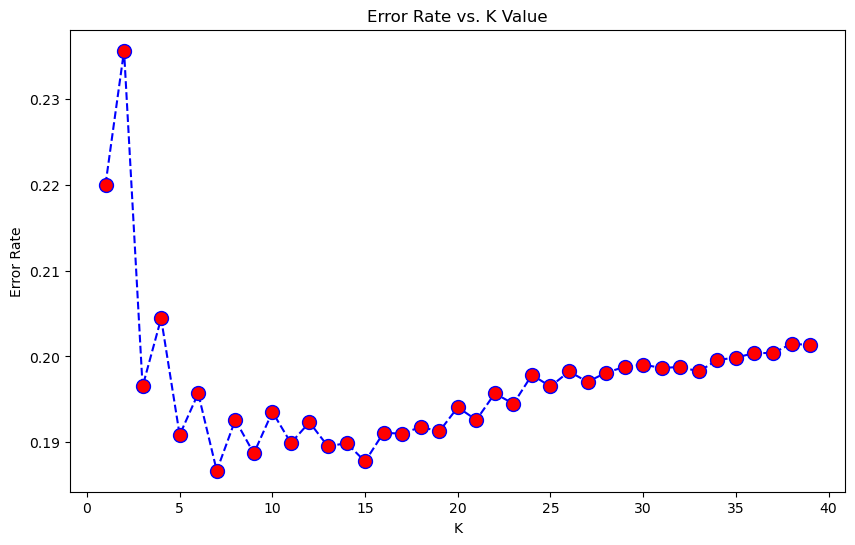

In [59]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [87]:
# NOW WITH K=7
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(tweet_train,label_train)
pred = knn.predict(tweet_test)

print('WITH K=7')
print('\n')
print(confusion_matrix(label_test,pred))
print('\n')
print(classification_report(label_test,pred))

WITH K=7


[[5483  269]
 [1070  608]]


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5752
           1       0.69      0.36      0.48      1678

    accuracy                           0.82      7430
   macro avg       0.76      0.66      0.68      7430
weighted avg       0.80      0.82      0.80      7430



## Two model approach

Two models are built:

Model 1 - To classify 'okay language' and 'bad language'

Model 2 - To classify 'bad language' into 2 groups; offensive language and hate speech

In [62]:
df_v3 = df_v2.copy()

In [63]:
df_v3.head(2)

,count,hate_speech,offensive_language,neither,class,tweet,tweet_length,tweet_edited,hate_speech_rating,offensive_language_rating,neither_rating,hate_speech_rating_words,offensive_language_rating_words,neither_rating_words,tweet_edited_with_ratings
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,RT woman shouldnt complain cleaning house amp ...,0.0,0.0,1.0,zero,zero,one,RT woman shouldnt complain cleaning house amp ...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,RT boy dats coldtyga dwn bad cuffin dat hoe 1s...,0.0,1.0,0.0,zero,one,zero,RT boy dats coldtyga dwn bad cuffin dat hoe 1s...


### Model One

### New classes created: 
#### 0 - neither (okay language)
#### 1 - offensive language and hate speech (bad language)

In [64]:
df_v3['class_new'] = df_v3['class'].apply(lambda x: 0 if x == 1 else 1)

In [65]:
df_v3['class_new'].unique()

array([1, 0])

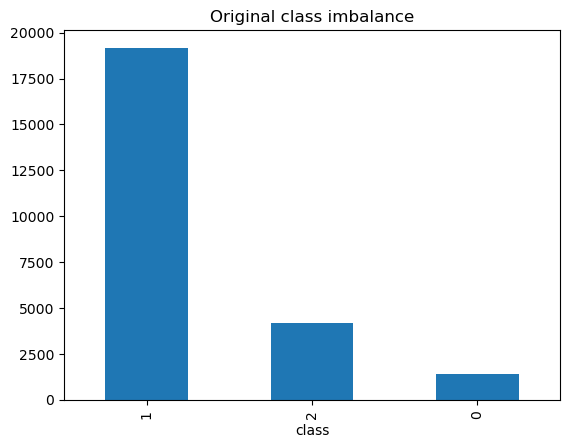

In [66]:
df_v3['class'].value_counts().plot(kind='bar')
plt.title('Original class imbalance')
plt.show()

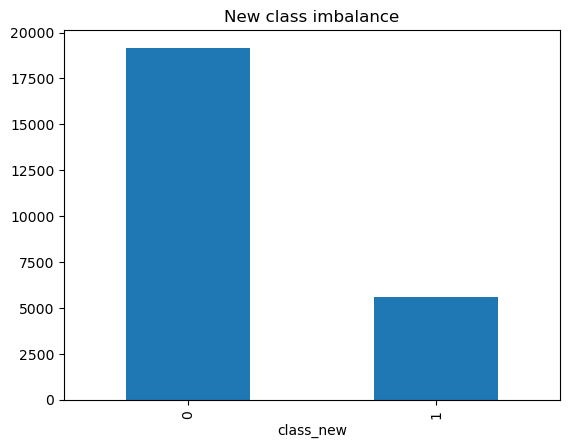

In [67]:
df_v3['class_new'].value_counts().plot(kind='bar')
plt.title('New class imbalance')
plt.show()

In [68]:
# New class imbalance
class_1 = round(df_v3['class_new'].value_counts()[1] / len(df_v3),2)
[1-class_1, class_1]

[0.77, 0.23]

### Naive Bayes Classifier

In [69]:
tweet__train,tweet__test,label__train,label__test=train_test_split(df_v3['tweet_edited_with_ratings'],
                                                           df_v3['class_new'],
                                                           test_size=0.2,
                                                              stratify=df_v3['class_new'])

In [70]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier', BernoulliNB())
])

pipeline.fit(tweet__train,label__train)

predictions = pipeline.predict(tweet__test)


print(confusion_matrix(label__test, predictions))
print('\n')
print(classification_report(label__test, predictions)) 

[[3756   79]
 [ 708  410]]


              precision    recall  f1-score   support

           0       0.84      0.98      0.91      3835
           1       0.84      0.37      0.51      1118

    accuracy                           0.84      4953
   macro avg       0.84      0.67      0.71      4953
weighted avg       0.84      0.84      0.82      4953



### DecisionTree classifier

In [71]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier', DecisionTreeClassifier())
])

pipeline.fit(tweet__train,label__train)

predictions = pipeline.predict(tweet__test)


print(confusion_matrix(label__test, predictions))
print('\n')
print(classification_report(label__test, predictions))      

[[3555  280]
 [ 288  830]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3835
           1       0.75      0.74      0.75      1118

    accuracy                           0.89      4953
   macro avg       0.84      0.83      0.84      4953
weighted avg       0.89      0.89      0.89      4953



### Random Forest Classifier

In [72]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])
pipeline.fit(tweet__train,label__train)

predictions = pipeline.predict(tweet__test)

print(confusion_matrix(label__test, predictions))
print('\n')
print(classification_report(label__test, predictions))      

[[3729  106]
 [ 478  640]]


              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3835
           1       0.86      0.57      0.69      1118

    accuracy                           0.88      4953
   macro avg       0.87      0.77      0.81      4953
weighted avg       0.88      0.88      0.87      4953



### Support Vector Machines Classifier

In [73]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier', SVC())
])

pipeline.fit(tweet__train,label__train)

predictions = pipeline.predict(tweet__test)


print(confusion_matrix(label__test, predictions))
print('\n')
print(classification_report(label__test, predictions))   

[[3635  200]
 [ 287  831]]


              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3835
           1       0.81      0.74      0.77      1118

    accuracy                           0.90      4953
   macro avg       0.87      0.85      0.86      4953
weighted avg       0.90      0.90      0.90      4953



### K Nearest Neighbors

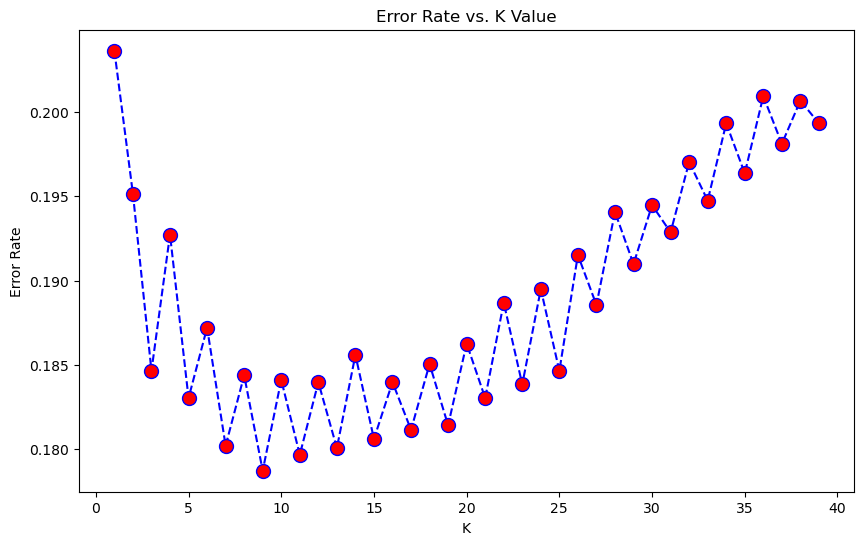

In [74]:
tweet_train,tweet_test,label_train,label_test=train_test_split(tweets_tfidf,df_v3['class_new'],test_size=0.3,stratify=df_v3['class_new'])

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(tweet_train,label_train)
    pred_i = knn.predict(tweet_test)
    error_rate.append(np.mean(pred_i != label_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [75]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(tweet_train,label_train)
pred = knn.predict(tweet_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(label_test,pred))
print('\n')
print(classification_report(label_test,pred))

WITH K=5


[[5446  306]
 [1054  624]]


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5752
           1       0.67      0.37      0.48      1678

    accuracy                           0.82      7430
   macro avg       0.75      0.66      0.68      7430
weighted avg       0.80      0.82      0.80      7430



## Model Two

### Classes are:
### 0 - Offensive language 
### 1 -  hateful speech

In [76]:
# Filtering dataset to include only offensive language and hateful speech rows
df_v4 = df_v2[(df_v2['class'] == 0) | (df_v2['class'] == 2)]

In [77]:
df_v4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5592 entries, 0 to 25296
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   count                            5592 non-null   int64  
 1   hate_speech                      5592 non-null   int64  
 2   offensive_language               5592 non-null   int64  
 3   neither                          5592 non-null   int64  
 4   class                            5592 non-null   int64  
 5   tweet                            5592 non-null   object 
 6   tweet_length                     5592 non-null   int64  
 7   tweet_edited                     5592 non-null   object 
 8   hate_speech_rating               5592 non-null   float64
 9   offensive_language_rating        5592 non-null   float64
 10  neither_rating                   5592 non-null   float64
 11  hate_speech_rating_words         5592 non-null   object 
 12  offensive_language_ratin

In [78]:
df_v4.head(2)

,count,hate_speech,offensive_language,neither,class,tweet,tweet_length,tweet_edited,hate_speech_rating,offensive_language_rating,neither_rating,hate_speech_rating_words,offensive_language_rating_words,neither_rating_words,tweet_edited_with_ratings
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,RT woman shouldnt complain cleaning house amp ...,0.0,0.000000,1.000000,zero,zero,one,RT woman shouldnt complain cleaning house amp ...
40,3,0,1,2,2,""" momma said no pussy cats inside my doghouse """,47,momma said pussy cats inside doghouse,0.0,0.333333,0.666667,zero,zero point three,zero point seven,momma said pussy cats inside doghouse zero zer...


In [79]:
# Further filtering
df_v4_filtered = df_v4[['tweet_edited_with_ratings','class']]

In [80]:
# Renaming classes
# 0 - offensive language
# 1 - hateful speech
df_v4_filtered['class_new'] = df_v4_filtered['class'].apply(lambda x: 0 if x == 2 else 1)

/var/folders/4z/s5yytqj535948_tn28lrcsr40000gn/T/ipykernel_12554/1337221479.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v4_filtered['class_new'] = df_v4_filtered['class'].apply(lambda x: 0 if x == 2 else 1)


In [81]:
df_v4_filtered.head(10)

,tweet_edited_with_ratings,class,class_new
0,RT woman shouldnt complain cleaning house amp ...,2,0
40,momma said pussy cats inside doghouse zero zer...,2,0
63,Addicted2Guys SimplyAddictedToGuys httptco1jL4...,2,0
66,AllAboutManFeet httptco3gzUpfuMev woof woof ho...,2,0
67,Allyhaaaaa Lemmie eat Oreo amp dishes One oreo...,2,0
70,ArizonasFinest6 eggplant emoji doey say looked...,2,0
75,BabyAnimalPics baby monkey bathtime httptco7KP...,2,0
85,Blackman38Tide queer gaywad zero point seven z...,0,1
90,CBBaby24 alsarabsss hes beaner smh tell hes me...,0,1
111,DevilGrimz youre fucking gay blacklisted hoe H...,0,1


In [82]:
tweet__train,tweet__test,label__train,label__test=train_test_split(df_v4_filtered['tweet_edited_with_ratings'],
                                                           df_v4_filtered['class_new'],
                                                           test_size=0.25,
                                                              stratify=df_v4_filtered['class_new'])

### Naive Bayes Classifier

In [83]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier', BernoulliNB())
])

pipeline.fit(tweet__train,label__train)

predictions = pipeline.predict(tweet__test)


print(confusion_matrix(label__test, predictions))
print('\n')
print(classification_report(label__test, predictions)) 

[[1000   40]
 [ 116  242]]


              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1040
           1       0.86      0.68      0.76       358

    accuracy                           0.89      1398
   macro avg       0.88      0.82      0.84      1398
weighted avg       0.89      0.89      0.88      1398



### Decision Tree Classifier

In [84]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier', DecisionTreeClassifier())
])

pipeline.fit(tweet__train,label__train)

predictions = pipeline.predict(tweet__test)


print(confusion_matrix(label__test, predictions))
print('\n')
print(classification_report(label__test, predictions))      

[[976  64]
 [ 70 288]]


              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1040
           1       0.82      0.80      0.81       358

    accuracy                           0.90      1398
   macro avg       0.88      0.87      0.87      1398
weighted avg       0.90      0.90      0.90      1398



### Random Forest Classifier

In [85]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

pipeline.fit(tweet__train,label__train)

predictions = pipeline.predict(tweet__test)


print(confusion_matrix(label__test, predictions))
print('\n')
print(classification_report(label__test, predictions))   

[[1011   29]
 [  93  265]]


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1040
           1       0.90      0.74      0.81       358

    accuracy                           0.91      1398
   macro avg       0.91      0.86      0.88      1398
weighted avg       0.91      0.91      0.91      1398



### Support Vector Machines

In [86]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier', SVC())
])

pipeline.fit(tweet__train,label__train)

predictions = pipeline.predict(tweet__test)


print(confusion_matrix(label__test, predictions))
print('\n')
print(classification_report(label__test, predictions))   

[[1017   23]
 [  93  265]]


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1040
           1       0.92      0.74      0.82       358

    accuracy                           0.92      1398
   macro avg       0.92      0.86      0.88      1398
weighted avg       0.92      0.92      0.91      1398

